**Loan-Prediction Case Study**

Loading Packages

In [2]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Reading the train data**

In [4]:
from google.colab import files
uploaded=files.upload()

Saving X_train.csv to X_train.csv


In [5]:
train=pd.read_csv('X_train.csv')

**Reading the test data**

In [6]:
from google.colab import files
uploaded=files.upload()


Saving X_test.csv to X_test (1).csv


In [7]:
X_test=pd.read_csv('X_test.csv')


In [8]:
from google.colab import files
uploaded=files.upload()

Saving Y_test.csv to Y_test.csv


In [9]:
Y_test=pd.read_csv('Y_test.csv')

**Understanding the Data**

In this section, we will look at the structure of the train and test datasets. Firstly, we will check the features present in our data and then we will look at their data types.


In [10]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

We have 12 independent variables and 1 target variable, i.e. Loan_Status in the train dataset. Let’s also have a look at the columns of test dataset.

In [11]:
X_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

We have similar features in the test dataset as the train dataset except the Loan_Status. 

We will predict the Loan_Status using the model built using the train data.

**Given below is the description for each variable.**

**Variable	Description** 

Loan_ID:	Unique Loan ID

Gender:	Male/ Female

Married:	Applicant married (Y/N)

Dependents:	Number of dependents

Education:	Applicant Education (Graduate/Under Graduate)

Self_Employed:	Self employed (Y/N)

ApplicantIncome:	Applicant income

CoapplicantIncome:	Coapplicant income

LoanAmount:	Loan amount in thousands

Loan_Amount_Term:	Term of loan in months

Credit_History:	Credit history meets guidelines

Property_Area:	Urban/ Semi Urban/ Rural

Loan_Status:	Loan approved (Y/N)


In [12]:
# Print data types for each variable
train.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area         object
Loan_Status           object
dtype: object

Let’s look at the shape of the dataset.

In [14]:
train.shape


(384, 13)

In [17]:
X_test.shape

(96, 12)

**Univariate Analysis:**

In this section, we will do univariate analysis. It is the simplest form of analyzing data where we examine each variable individually.

For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. 

For numerical features, probability density plots can be used to look at the distribution of the variable.

**Target Variable**

We will first look at the target variable, i.e., **Loan_Status**. 

As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

Frequency table of a variable will give us the count of each category in that variable.


In [18]:
train['Loan_Status'].value_counts()

Y    271
N    113
Name: Loan_Status, dtype: int64

In [19]:
# Normalize can be set to True to print proportions instead of number 
train['Loan_Status'].value_counts(normalize=True)


Y    0.705729
N    0.294271
Name: Loan_Status, dtype: float64

Plotting the Bar chart

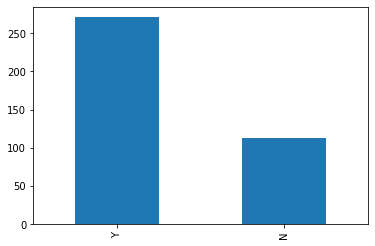

In [20]:
train['Loan_Status'].value_counts().plot.bar()

**Now lets visualize each variable separately.**

Different types of variables are Categorical, ordinal and numerical.

•	Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

•	Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

•	Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

Let’s visualize the categorical and ordinal features first.


**Independent Variable (Categorical)**

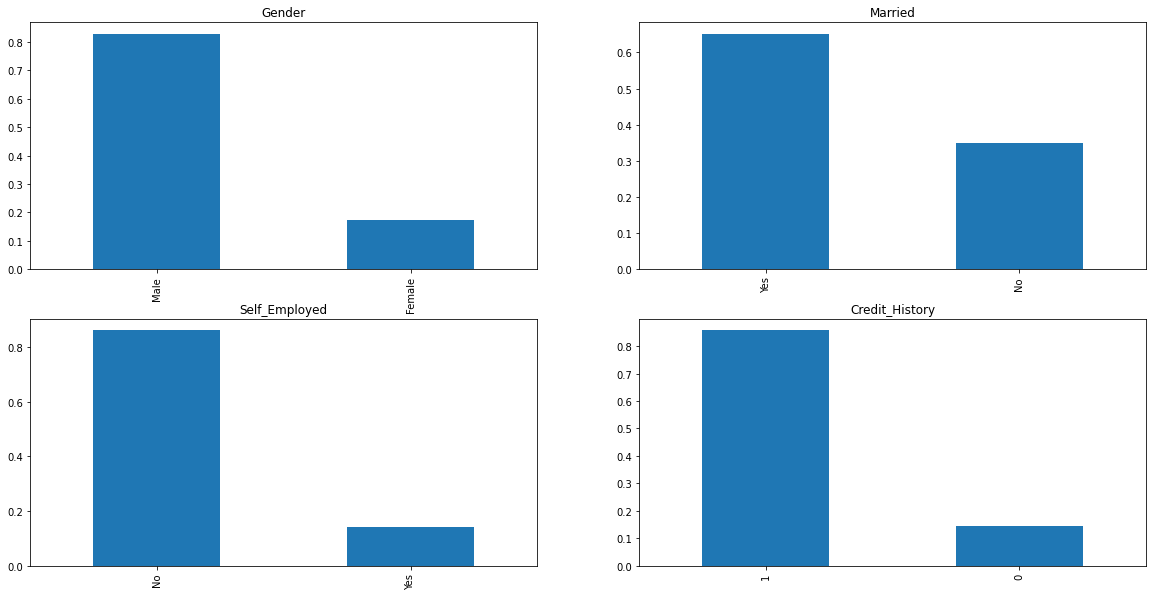

In [22]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.show()


It can be inferred from the above bar plots that:
•	80% applicants in the dataset are male.
•	Around 65% of the applicants in the dataset are married.
•	Around 15% applicants in the dataset are self employed.
•	Around 85% applicants have repaid their debts.


Now let’s visualize the ordinal variables.

**Independent Variable (Ordinal)**


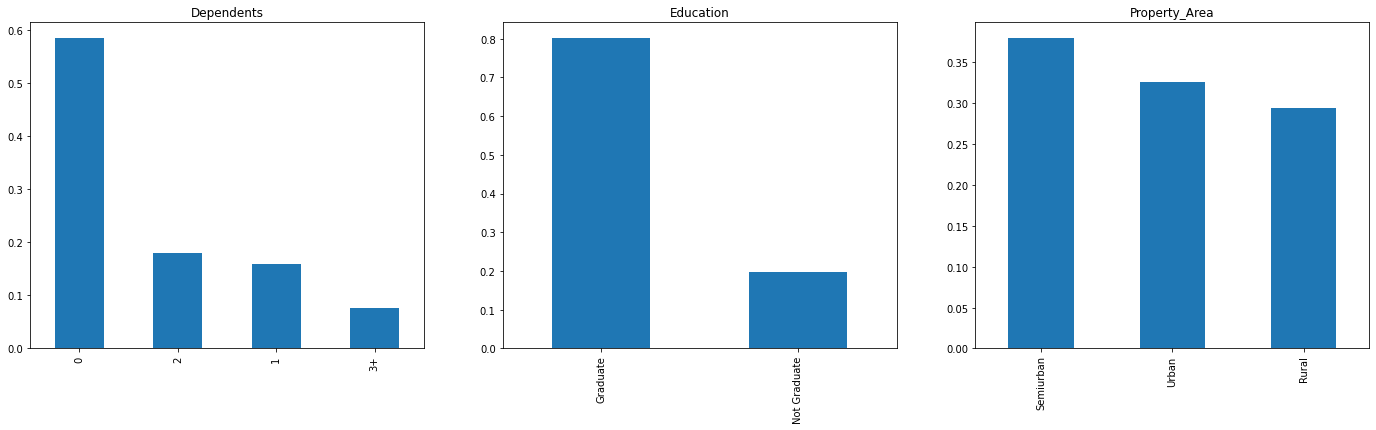

In [23]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()



Following inferences can be made from the above bar plots:

•	Most of the applicants don’t have any dependents.

•	Around 80% of the applicants are Graduate.

•	Most of the applicants are from Semiurban area.


**Independent Variable (Numerical)**

Till now we have seen the categorical and ordinal variables and now lets visualize the numerical variables. 

Lets look at the distribution of Applicant income first.


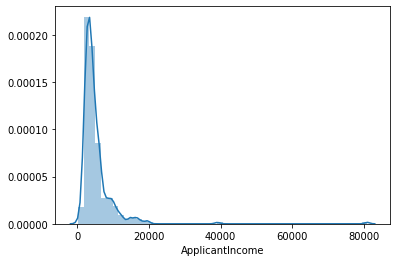

In [25]:
sns.distplot(train['ApplicantIncome']);


It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

Box-Plot

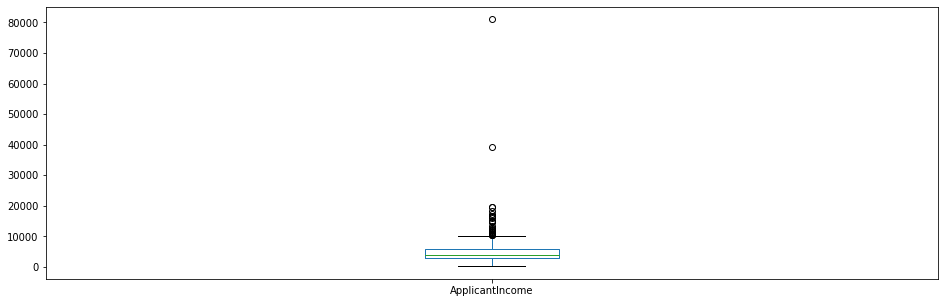

In [26]:
train['ApplicantIncome'].plot.box(figsize=(16,5))


The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. 

Let us segregate them by Education:

Text(0.5, 0.98, '')

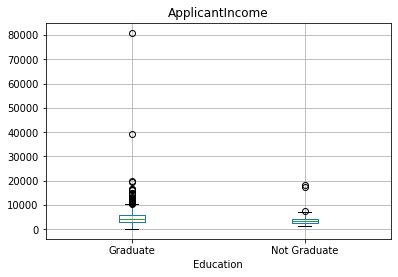

In [29]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("") #suprases the title

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

Let’s look at the Coapplicant income distribution.

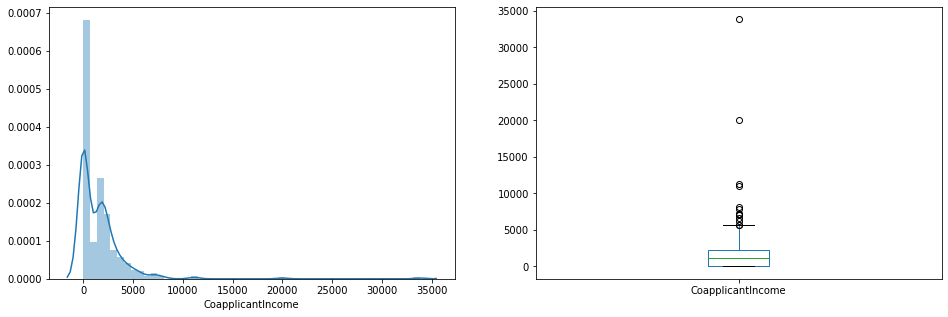

In [30]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()



We see a similar distribution as that of the applicant income. 

Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

Let’s look at the distribution of LoanAmount variable.


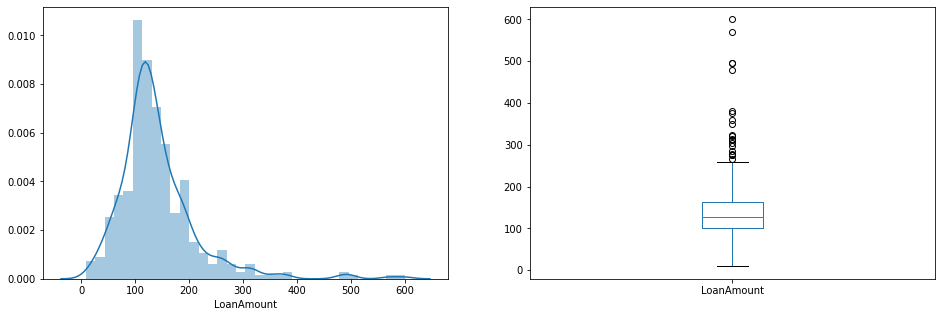

In [31]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()


We see a lot of outliers in this variable and the distribution is fairly normal. 

We will treat the outliers in later sections.

Now we would like to know how well each feature correlate with Loan Status. 

So, now we will look at bivariate analysis.


Lets recall some of the hypotheses that we generated earlier:

•	Applicants with high income should have more chances of loan approval.

•	Applicants who have repaid their previous debts should have higher chances of loan approval.

•	Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.

•	Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

Lets try to test the above mentioned hypotheses using bivariate analysis

After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.


**Categorical Independent Variable vs Target Variable**

First of all we will find the relation between target variable and categorical independent variables.

Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans.


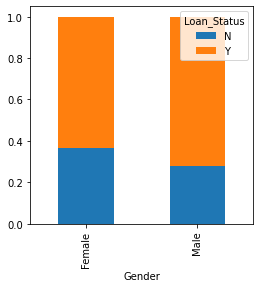

In [32]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))


It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans.


Now let us visualize the remaining categorical variables vs target variable.


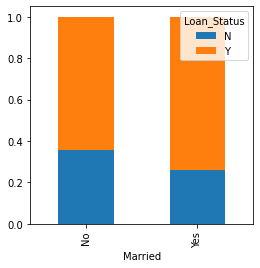

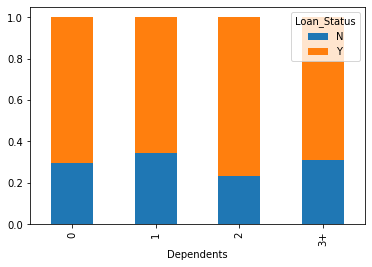

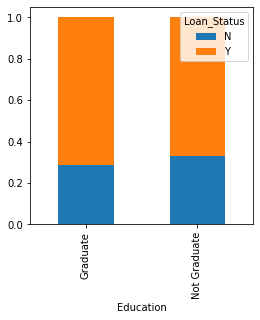

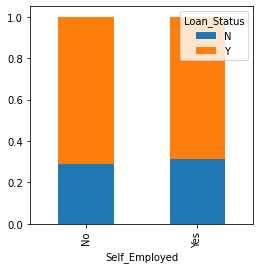

In [33]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()


•	Proportion of married applicants is higher for the approved loans.

•	Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

•	There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

Now we will look at the relationship between remaining categorical independent variables and Loan_Status.


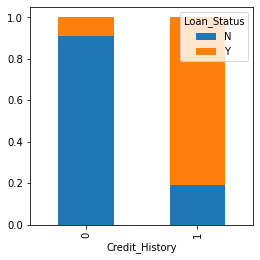

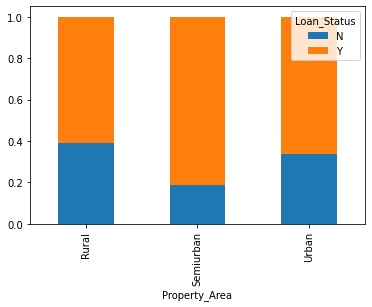

In [34]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()


•	It seems people with credit history as 1 are more likely to get their loans approved.

•	Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

Now let’s visualize numerical independent variables with respect to target variable.


**Numerical Independent Variable vs Target Variable**

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.


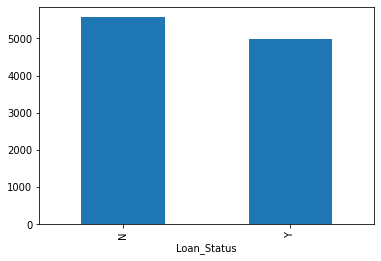

In [35]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Here the y-axis represents the mean applicant income. 

We don’t see any change in the mean income. 

So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [61]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)
train


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001032,Male,No,0,Graduate,No,4950,0.0,125,360,1,Urban,Y,High
1,LP001824,Male,Yes,1,Graduate,No,2882,1843.0,123,480,1,Semiurban,Y,Average
2,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56,180,1,Semiurban,Y,Average
3,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112,360,1,Urban,Y,Very high
4,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136,360,1,Urban,Y,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,LP002585,Male,Yes,0,Graduate,No,3597,2157.0,119,360,0,Rural,N,Average
380,LP001841,Male,No,0,Not Graduate,Yes,2583,2167.0,104,360,1,Rural,Y,Average
381,LP002820,Male,Yes,0,Graduate,No,5923,2054.0,211,360,1,Rural,Y,High
382,LP001744,Male,No,0,Graduate,No,2971,2791.0,144,360,1,Semiurban,Y,Average


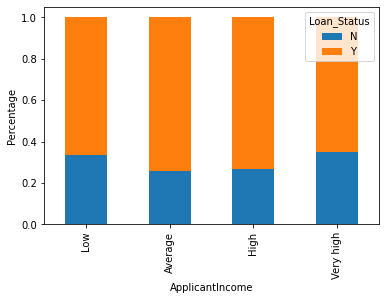

In [38]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')


It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

We will analyze the coapplicant income and loan amount variable in similar manner.


In [63]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)
train


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin
0,LP001032,Male,No,0,Graduate,No,4950,0.0,125,360,1,Urban,Y,High,NaN
1,LP001824,Male,Yes,1,Graduate,No,2882,1843.0,123,480,1,Semiurban,Y,Average,Average
2,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56,180,1,Semiurban,Y,Average,High
3,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112,360,1,Urban,Y,Very high,NaN
4,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136,360,1,Urban,Y,Low,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,LP002585,Male,Yes,0,Graduate,No,3597,2157.0,119,360,0,Rural,N,Average,Average
380,LP001841,Male,No,0,Not Graduate,Yes,2583,2167.0,104,360,1,Rural,Y,Average,Average
381,LP002820,Male,Yes,0,Graduate,No,5923,2054.0,211,360,1,Rural,Y,High,Average
382,LP001744,Male,No,0,Graduate,No,2971,2791.0,144,360,1,Semiurban,Y,Average,Average


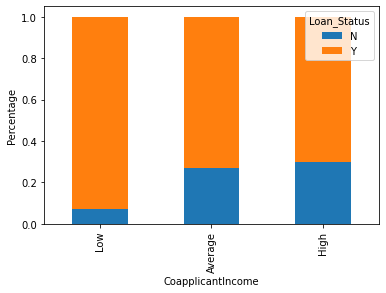

In [64]:
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

It shows that if coapplicant’s income is less the chances of loan approval are high. 

But this does not look right. 

The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. 

So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.


Text(0, 0.5, 'Percentage')

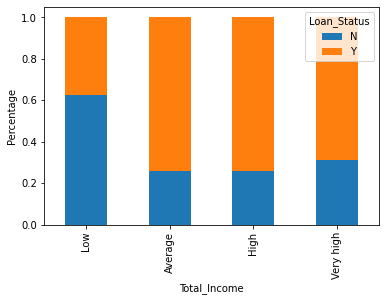

In [65]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

Let’s visualize the Loan amount variable.


Text(0, 0.5, 'Percentage')

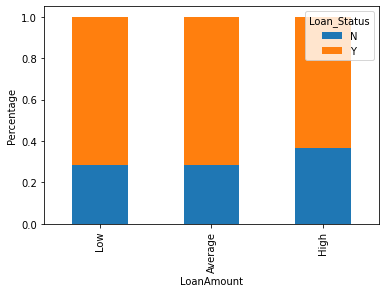

In [67]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')


It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable.

We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. 

One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.


In [75]:
train['Dependents'].replace('3+', 3,inplace=True)
X_test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)


**Missing Value and Outlier Treatment**

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

**Missing value imputation**

Let’s list out feature-wise count of missing values.


In [84]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

•	**For numerical variables:** imputation using mean or median

• **	For categorical variables:** imputation using mode

There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features.


In [85]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)


Now let’s try to find a way to fill the missing values in Loan_Amount_Term.

We will look at the value count of the Loan amount term variable.

In [86]:
train['Loan_Amount_Term'].value_counts()

360    326
180     30
480     11
300      8
120      3
84       2
60       2
240      1
36       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most. 

So we will replace the missing values in this variable using the mode of this variable.

In [87]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Now we will see the LoanAmount variable. 

As it is a numerical variable, we can use mean or median to impute the missing values. 

We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [88]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

Now lets check whether all the missing values are filled in the dataset.

In [89]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see that all the missing values have been filled in the test dataset. 

Let’s fill all the missing values in the test dataset too with the same approach.

In [91]:
X_test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
X_test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
X_test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
X_test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
X_test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
X_test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)


**Outlier Treatment**

As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data. 

Outliers often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must take steps to remove outliers from our data sets. 

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called **right skewness**. 

One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. 

So, we get a distribution similar to normal distribution.

Let’s visualize the effect of log transformation. We will do the similar changes to the test file simultaneously.



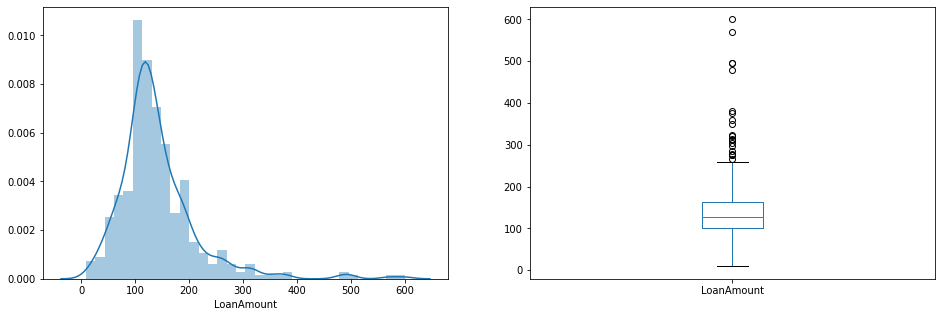

In [95]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

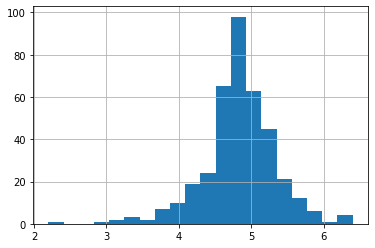

In [94]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
X_test['LoanAmount_log'] = np.log(X_test['LoanAmount'])


Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. 

Let’s build a logistic regression model and make predictions for the test dataset.

**Evaluation Metrics for Classification Problems**

•Accuracy: Let us understand it using the confusion matrix which is a tabular representation of Actual vs Predicted values. 

•	True Positive - Targets which are actually true(Y) and we have predicted them true(Y)

•	True Negative - Targets which are actually false(N) and we have predicted them false(N)

•	False Positive - Targets which are actually false(N) but we have predicted them true(T)

•	False Negative - Targets which are actually true(T) but we have predicted them false(N)

Using these values, we can calculate the accuracy of the model. The accuracy is given by:

•Precision: It is a measure of correctness achieved in true prediction i.e. of observations labeled as true, how many are actually labeled true. 

Precision = TP / (TP + FP)

•Recall(Sensitivity) - It is a measure of actual observations which are predicted correctly i.e. how many observations of true class are labeled correctly. It is also known as ‘Sensitivity’. 

Recall = TP / (TP + FN)

•Specificity - It is a measure of how many observations of false class are labeled correctly. 

Specificity = TN / (TN + FP)

Specificity and Sensitivity plays a crucial role in deriving ROC curve.

•	Receiver Operating Characteristic(ROC) summarizes the model’s performance by evaluating the trade offs between true positive rate (sensitivity) and false positive rate(1- specificity).

The area under curve (AUC), referred to as index of accuracy(A) or concordance index, is a perfect performance metric for ROC curve. Higher the area under curve, better the prediction power of the model.


**Model Building : Part I**

Let us make our first model to predict the target variable. We will start with Logistic Regression which is used for predicting binary outcome.

•	Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.

•	Logistic regression is an estimation of Logit function. Logit function is simply a log of odds in favor of the event.

•	This function creates a s-shaped curve with the probability estimate, which is very similar to the required step wise function


In [96]:
train=train.drop('Loan_ID',axis=1)
X_test=X_test.drop('Loan_ID',axis=1)


Sklearn requires the target variable in a separate dataset. 

So, we will drop our target variable from the train dataset and save it in another dataset.


In [97]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status


Now we will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare. Let us understand the process of dummies first:

•	Consider the “Gender” variable. It has two classes, Male and Female.

•	As logistic regression takes only the numerical values as input, we have to change male and female into numerical value.

•	Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female), one for each class, i.e. Male and Female.

•	Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.


In [99]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
X_test=pd.get_dummies(X_test)


In [100]:
train.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,4950,0.0,125,360,1,1,4.828314,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
1,2882,1843.0,123,480,1,1,4.812184,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0
2,3000,3416.0,56,180,1,1,4.025352,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0
3,9703,0.0,112,360,1,1,4.718499,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1
4,2333,2417.0,136,360,1,1,4.912655,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1


In [101]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)


In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Here the C parameter represents inverse of regularization strength.

Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. Smaller values of C specify stronger regularization. 

To learn about other parameters, refer here: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Let’s predict the Loan_Status for validation set and calculate its accuracy.

In [103]:
pred_cv = model.predict(x_cv)

In [104]:
accuracy_score(y_cv,pred_cv)

0.8362068965517241

Let’s make predictions for the test dataset.

In [106]:
pred_test = model.predict(X_test)

In [113]:
Y_test['Target'].replace('N',0, inplace=True)
Y_test['Target'].replace('Y',1,inplace=True)


In [116]:
Y_test.head(5)

,Target
0,0
1,1
2,1
3,1
4,1


In [115]:
accuracy_score(Y_test,pred_test)

0.75

**Logistic Regression using stratified k-folds cross validation**

To check how robust our model is to unseen data, we can use Validation. It is a technique which involves reserving a particular sample of a dataset on which you do not train the model. 

Later, you test your model on this sample before finalizing it. Some of the common methods for validation are listed below:

•	The validation set approach

•	k-fold cross validation

•	Leave one out cross validation (LOOCV)

•	Stratified k-fold cross validation


We will learn about stratified k-fold cross validation. Let us understand how it works:

•	Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole.

•	For example, in a binary classification problem where each class comprises of 50% of the data, it is best to arrange the data such that in every fold, each class comprises of about half the instances.

•	It is generally a better approach when dealing with both bias and variance.

•	A randomly selected fold might not adequately represent the minor class, 
particularly in cases where there is a huge class imbalance.

In [117]:
from sklearn.model_selection import StratifiedKFold

In [121]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
  print('\n{} of kfold {}'.format(i,kf.n_splits))
  xtr,xvl = X.loc[train_index],X.loc[test_index]
  ytr,yvl = y[train_index],y[test_index]

  model = LogisticRegression(random_state=1)
  model.fit(xtr, ytr)

  pred_test = model.predict(xvl)
  score = accuracy_score(yvl,pred_test)
  print('accuracy_score',score)

  i+=1
  pred_test = model.predict(X_test)
  pred=model.predict_proba(xvl)[:,1]
  


1 of kfold 5
accuracy_score 0.8311688311688312

2 of kfold 5
accuracy_score 0.7792207792207793

3 of kfold 5
accuracy_score 0.7922077922077922

4 of kfold 5
accuracy_score 0.7792207792207793

5 of kfold 5
accuracy_score 0.8289473684210527


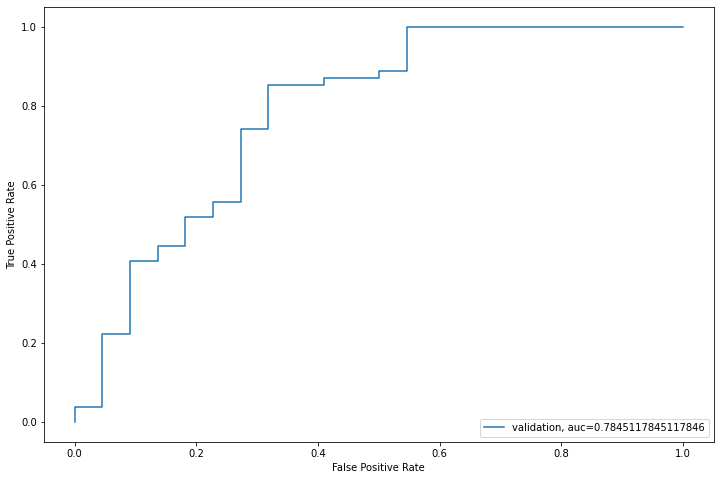

In [122]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()


**Feature Engineering**

Based on the domain knowledge, we can come up with new features that might affect the target variable. 

We will create the following three new features:

•**	Total Income **- As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.

•	**EMI **- EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.

•**	Balance Income **- This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.


In [123]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
X_test['Total_Income']=X_test['ApplicantIncome']+X_test['CoapplicantIncome']


Let’s check the distribution of Total Income.

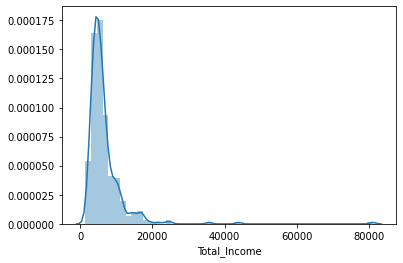

In [124]:
sns.distplot(train['Total_Income']);

We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

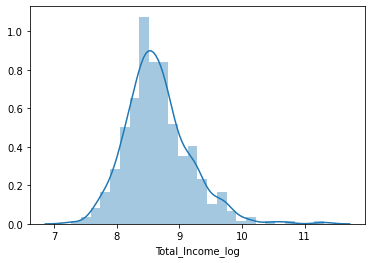

In [125]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log']);
X_test['Total_Income_log'] = np.log(X_test['Total_Income'])


Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. 

Let’s create the EMI feature now.

In [126]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
X_test['EMI']=X_test['LoanAmount']/X_test['Loan_Amount_Term']


Let’s check the distribution of EMI variable.


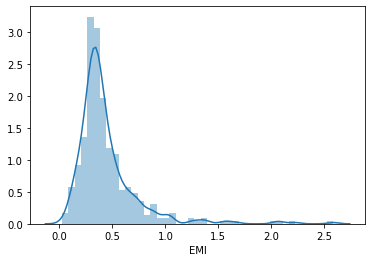

In [127]:
sns.distplot(train['EMI']);

Let us create Balance Income feature now and check its distribution.

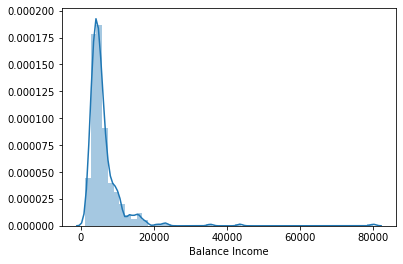

In [128]:
train['Balance Income']=train['Total_Income']-(train['EMI']*1000) # Multiply with 1000 to make the units equal 
X_test['Balance Income']=X_test['Total_Income']-(X_test['EMI']*1000)
sns.distplot(train['Balance Income']);


Let us now drop the variables which we used to create these new features.

Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. 

We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [129]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
X_test=X_test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)


**Model Building : Part II**


After creating new features, we can continue the model building process. 

So we will start with logistic regression model and then move over to more complex models like RandomForest and XGBoost.

We will build the following models in this section.

•	Logistic Regression

•	Decision Tree

•	Random Forest

•	XGBoost




Let’s prepare the data for feeding into the models.

In [131]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status       # Save target variable in separate dataset


In [133]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
  print('\n{} of kfold {}'.format(i,kf.n_splits))
  xtr,xvl = X.loc[train_index],X.loc[test_index]
  ytr,yvl = y[train_index],y[test_index]

  model = LogisticRegression(random_state=1)
  model.fit(xtr, ytr)
  pred_test = model.predict(xvl)
  score = accuracy_score(yvl,pred_test)
  print('accuracy_score',score)
  i+=1
  pred_test = model.predict(X_test)
  pred=model.predict_proba(xvl)[:,1]



1 of kfold 5
accuracy_score 0.8181818181818182

2 of kfold 5
accuracy_score 0.7922077922077922

3 of kfold 5
accuracy_score 0.6883116883116883

4 of kfold 5
accuracy_score 0.7402597402597403

5 of kfold 5
accuracy_score 0.8157894736842105


So we can infer feature engineering has not improved the model. Let us look at some other algorithms.

Decision Tree

In [135]:
from sklearn import tree
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
  print('\n{} of kfold {}'.format(i,kf.n_splits))
  xtr,xvl = X.loc[train_index],X.loc[test_index]
  ytr,yvl = y[train_index],y[test_index]

  model = tree.DecisionTreeClassifier(random_state=1)
  model.fit(xtr, ytr)
  pred_test = model.predict(xvl)
  score = accuracy_score(yvl,pred_test)
  print('accuracy_score',score)
  i+=1
  pred_test = model.predict(X_test)



1 of kfold 5
accuracy_score 0.7012987012987013

2 of kfold 5
accuracy_score 0.7922077922077922

3 of kfold 5
accuracy_score 0.7142857142857143

4 of kfold 5
accuracy_score 0.7532467532467533

5 of kfold 5
accuracy_score 0.75


Random Forest

In [137]:
from sklearn.ensemble import RandomForestClassifier
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
  print('\n{} of kfold {}'.format(i,kf.n_splits))
  xtr,xvl = X.loc[train_index],X.loc[test_index]
  ytr,yvl = y[train_index],y[test_index]

  model = RandomForestClassifier(random_state=1, max_depth=10)
  model.fit(xtr, ytr)
  pred_test = model.predict(xvl)
  score = accuracy_score(yvl,pred_test)
  print('accuracy_score',score)
  i+=1
  pred_test = model.predict(X_test)



1 of kfold 5
accuracy_score 0.8181818181818182

2 of kfold 5
accuracy_score 0.8441558441558441

3 of kfold 5
accuracy_score 0.7922077922077922

4 of kfold 5
accuracy_score 0.8051948051948052

5 of kfold 5
accuracy_score 0.8421052631578947


We will try to improve the accuracy by tuning the hyperparameters for this model. 
We will use grid search to get the optimized values of hyper parameters. 

**Grid-search** is a way to select the best of a family of hyper parameters, parametrized by a grid of parameters.
We will tune the max_depth and n_estimators parameters. max_depth decides the maximum depth of the tree and n_estimators decides the number of trees that will be used in random forest model.


In [138]:
from sklearn.model_selection import GridSearchCV
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)
# Fit the grid search model
grid_search.fit(x_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                

In [139]:
# Estimating the optimized value
grid_search.best_estimator_


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=161,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

So, the optimized value for the max_depth variable is 5 and for n_estimator is 161. Now let’s build the model using these optimized values.

In [141]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
  print('\n{} of kfold {}'.format(i,kf.n_splits))
  xtr,xvl = X.loc[train_index],X.loc[test_index]
  ytr,yvl = y[train_index],y[test_index]

  model = RandomForestClassifier(random_state=1, max_depth=5, n_estimators=161)
  model.fit(xtr, ytr)
  pred_test = model.predict(xvl)
  score = accuracy_score(yvl,pred_test)
  print('accuracy_score',score)
  i+=1
  pred_test = model.predict(X_test)
  pred2=model.predict_proba(X_test)[:,1]



1 of kfold 5
accuracy_score 0.8051948051948052

2 of kfold 5
accuracy_score 0.8311688311688312

3 of kfold 5
accuracy_score 0.7792207792207793

4 of kfold 5
accuracy_score 0.8051948051948052

5 of kfold 5
accuracy_score 0.8552631578947368


Let us find the feature importance now, i.e. which features are most important for this problem. We will use feature_importances_ attribute of sklearn to do so.

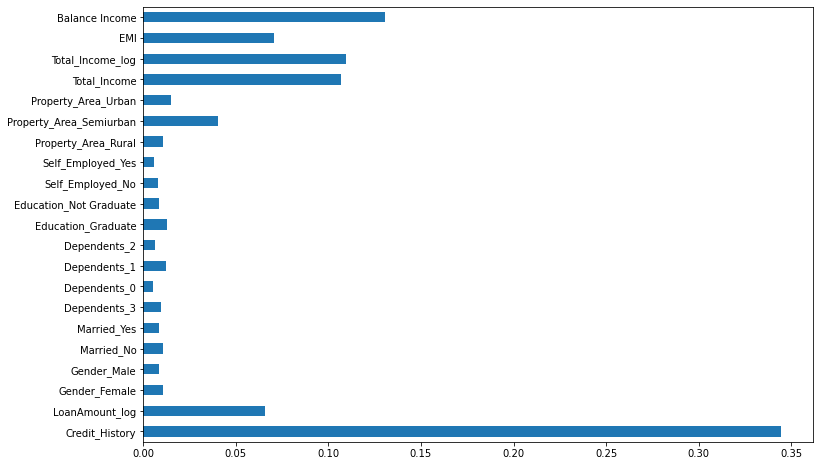

In [142]:
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))


We can see that Credit_History is the most important feature followed by Balance Income, Total Income, EMI. So, feature engineering helped us in predicting our target variable.

XGBoost

XGBoost is a fast and efficient algorithm and has been used to by the winners of many data science competitions. 

XGBoost works only with numeric variables and we have already replaced the categorical variables with numeric variables. Let’s have a look at the parameters that we are going to use in our model.

•	n_estimator: This specifies the number of trees for the model.

•	max_depth: We can specify maximum depth of a tree using this parameter.


In [144]:
from xgboost import XGBClassifier
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
  print('\n{} of kfold {}'.format(i,kf.n_splits))
  xtr,xvl = X.loc[train_index],X.loc[test_index]
  ytr,yvl = y[train_index],y[test_index]

  model = XGBClassifier(n_estimators=50, max_depth=4)
  model.fit(xtr, ytr)
  pred_test = model.predict(xvl)
  score = accuracy_score(yvl,pred_test)
  print('accuracy_score',score)
  i+=1
  pred_test = model.predict(X_test)
  pred3=model.predict_proba(X_test)[:,1]



1 of kfold 5
accuracy_score 0.8441558441558441

2 of kfold 5
accuracy_score 0.8701298701298701

3 of kfold 5
accuracy_score 0.7792207792207793

4 of kfold 5
accuracy_score 0.8051948051948052

5 of kfold 5
accuracy_score 0.8289473684210527
